In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression



a=np.loadtxt("./数据集/Pdata12_1.txt")   #加载表中x1,x2,y的13行3列数据
md=LinearRegression().fit(a[:,:2],a[:,2])    #构建并拟合模型
y=md.predict(a[:,:2])       #求预测值
b0=md.intercept_; b12=md.coef_   #输出回归系数
R2=md.score(a[:,:2],a[:,2])      #计算R^2
print("b0=%.4f\nb12=%.4f%10.4f"%(b0,b12[0],b12[1]))
print("拟合优度R^2=%.4f"%R2)


b0=52.5773
b12=1.4683    0.6623
拟合优度R^2=0.9787


In [2]:
import numpy as np; import statsmodels.api as sm


import warnings
warnings.filterwarnings("ignore")


a=np.loadtxt("./数据集/Pdata12_1.txt")
#加载表中x1,x2,y的13行3列数据（数据见封底二维码）
d={'x1':a[:,0],'x2':a[:,1],'y':a[:,2]}
md=sm.formula.ols('y~x1+x2',d).fit()  #构建并拟合模型
print(md.summary(),'\n------------\n')  #显示模型所有信息
ypred=md.predict({'x1':a[:,0],'x2':a[:,1]})  #计算预测值
print(ypred)  #输出预测值

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     229.5
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           4.41e-09
Time:                        16:45:46   Log-Likelihood:                -28.156
No. Observations:                  13   AIC:                             62.31
Df Residuals:                      10   BIC:                             64.01
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.5773      2.286     22.998      0.0

In [3]:
import numpy as np; import statsmodels.api as sm



a=np.loadtxt("./数据集/Pdata12_1.txt")
#加载表中x1,x2,y的13行3列数据（数据见封底二维码）
X = sm.add_constant(a[:,:2])  #增加第一列全部元素为1得到增广矩阵
md=sm.OLS(a[:,2],X).fit()  #构建并拟合模型
print(md.params,'\n------------\n')  #提取所有回归系数
y=md.predict(X)      #求已知自变量值的预测值
print(md.summary2())  #输出模型的所有结果

[52.57734888  1.46830574  0.66225049] 
------------

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.974   
Dependent Variable: y                AIC:                62.3124 
Date:               2022-08-13 16:46 BIC:                64.0072 
No. Observations:   13               Log-Likelihood:     -28.156 
Df Model:           2                F-statistic:        229.5   
Df Residuals:       10               Prob (F-statistic): 4.41e-09
R-squared:          0.979            Scale:              5.7904  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     52.5773     2.2862   22.9980   0.0000   47.4834   57.6713
x1         1.4683     0.1213   12.1047   0.0000    1.1980    1.7386
x2         0.6623     0.0459   14.4424   0.0000    0.5601    0.7644
----------------------------

In [4]:
import numpy as np; import statsmodels.api as sm




a=np.loadtxt("./数据集/Pdata12_3.txt")   #加载表中x1,x2,x3,y的11行4列数据
x=a[:,:3]  #提出自变量观测值矩阵
X=sm.add_constant(x)  #增加第一列全部元素为1得到增广矩阵
md=sm.OLS(a[:,3],X).fit()  #构建并拟合模型
b=md.params          #提取所有回归系数
y=md.predict(X)      #求已知自变量值的预测值
print(md.summary())  #输出模型的所有结果
print("相关系数矩阵:\n",np.corrcoef(x.T))
X1=sm.add_constant(a[:,0])
md1=sm.OLS(a[:,2],X1).fit()
print("回归系数为：",md1.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     542.0
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           1.20e-08
Time:                        16:47:26   Log-Likelihood:                -1.7480
No. Observations:                  11   AIC:                             11.50
Df Residuals:                       7   BIC:                             13.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6203      0.897     -9.611      0.0

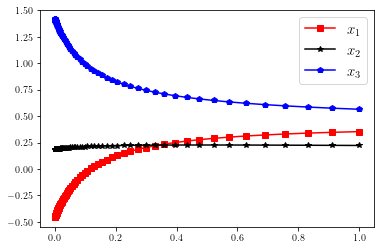

最优alpha= 0.001788649529057435
标准化数据的所有回归系数为： [0.25175125 0.2261851  0.6902453 ]
原数据的回归系数为： [-9.53202618703748, array([0.04098598, 0.62314057, 0.15199106])]
拟合优度： 0.9843368597895965


In [7]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from scipy.stats import zscore





plt.rc('text', usetex=True)  #没装LaTeX宏包把该句注释
a=np.loadtxt("./数据集/Pdata12_3.txt")
n=a.shape[1]-1  #自变量的总个数
aa=zscore(a)  #数据标准化
x=aa[:,:n]; y=aa[:,n]  #提出自变量和因变量观测值矩阵
b=[]  #用于存储回归系数的空列表
kk=np.logspace(-4,0,100)  #循环迭代的不同k值
for k in kk:
    md=Ridge(alpha=k).fit(x,y)
    b.append(md.coef_)
st=['s-r','*-k','p-b']  #下面画图的控制字符串
for i in range(3): plt.plot(kk,np.array(b)[:,i],st[i]);
plt.legend(['$x_1$','$x_2$','$x_3$'],fontsize=15); plt.show()
mdcv=RidgeCV(alphas=np.logspace(-4,0,100)).fit(x,y);
print("最优alpha=",mdcv.alpha_) 
md0=Ridge(mdcv.alpha_).fit(x,y)  #构建并拟合模型
md0=Ridge(0.4).fit(x,y)  #构建并拟合模型
cs0=md0.coef_  #提出标准化数据的回归系数b1,b2,b3
print("标准化数据的所有回归系数为：",cs0)
mu=np.mean(a,axis=0); s=np.std(a,axis=0,ddof=1) #计算所有指标的均值和标准差
params=[mu[-1]-s[-1]*sum(cs0*mu[:-1]/s[:-1]),s[-1]*cs0/s[:-1]] 
print("原数据的回归系数为：",params)
print("拟合优度：",md0.score(x,y))

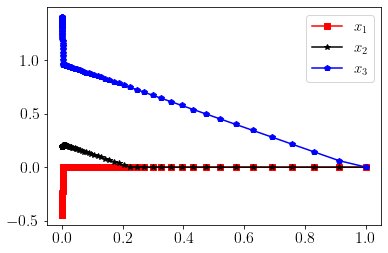

最优alpha= 0.0001
标准化数据的所有回归系数为： [0.         0.01358604 0.76138391]
原数据的回归系数为： [-1.660204910919525, array([0.        , 0.03742957, 0.16765569])]
拟合优度： 0.9061154424386821


In [8]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from scipy.stats import zscore





plt.rc('font',size=16)
plt.rc('text', usetex=True)  #没装LaTeX宏包把该句注释
a=np.loadtxt("./数据集/Pdata12_3.txt")
n=a.shape[1]-1  #自变量的总个数
aa=zscore(a)  #数据标准化
x=aa[:,:n]; y=aa[:,n]  #提出自变量和因变量观测值矩阵
b=[]  #用于存储回归系数的空列表
kk=np.logspace(-4,0,100)  #循环迭代的不同k值
for k in kk:
    md=Lasso(alpha=k).fit(x,y)
    b.append(md.coef_)
st=['s-r','*-k','p-b']  #下面画图的控制字符串
for i in range(3): plt.plot(kk,np.array(b)[:,i],st[i]);
plt.legend(['$x_1$','$x_2$','$x_3$'],fontsize=15); plt.show()
mdcv=LassoCV(alphas=np.logspace(-4,0,100)).fit(x,y);
print("最优alpha=",mdcv.alpha_) 
#md0=Lasso(mdcv.alpha_).fit(x,y)  #构建并拟合模型
md0=Lasso(0.21).fit(x,y)  #构建并拟合模型
cs0=md0.coef_  #提出标准化数据的回归系数b1,b2,b3
print("标准化数据的所有回归系数为：",cs0)
mu=np.mean(a,axis=0); s=np.std(a,axis=0,ddof=1) #计算所有指标的均值和标准差
params=[mu[-1]-s[-1]*sum(cs0*mu[:-1]/s[:-1]),s[-1]*cs0/s[:-1]] 
print("原数据的回归系数为：",params)
print("拟合优度：",md0.score(x,y))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1623.
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           1.14e-06
Time:                        16:56:24   Log-Likelihood:                -28.919
No. Observations:                   9   AIC:                             67.84
Df Residuals:                       4   BIC:                             68.82
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1028.4134     58.305    -17.638      0.0

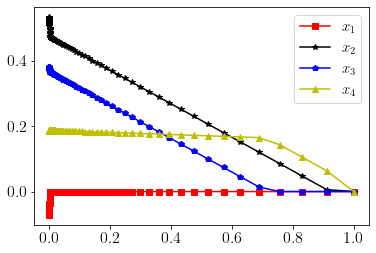

标准化数据的所有回归系数为： [0.         0.44723893 0.34045523 0.18555833]
原数据的回归系数为： [-908.2058953990945, array([  0.        , 203.09384921,   1.45621116,   2.04693134])]
拟合优度： 0.9965807211503689


In [9]:
import numpy as np; import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from scipy.stats import zscore




plt.rc('text', usetex=True)  #没装LaTeX宏包把该句注释
a=np.loadtxt("./数据集/Pdata12_6.txt")  #加载表中的9行5列数据
n=a.shape[1]-1  #自变量的总个数
x=a[:,:n]  #提出自变量观测值矩阵
X = sm.add_constant(x)
md=sm.OLS(a[:,n],X).fit()  #构建并拟合模型
print(md.summary())  #输出模型的所有结果

aa=zscore(a)  #数据标准化
x=aa[:,:n]; y=aa[:,n]  #提出自变量和因变量观测值矩阵
b=[]  #用于存储回归系数的空列表
kk=np.logspace(-4,0,100)  #循环迭代的不同k值
for k in kk:
    md=Lasso(alpha=k).fit(x,y)
    b.append(md.coef_)
st=['s-r','*-k','p-b','^-y']  #下面画图的控制字符串
for i in range(n): plt.plot(kk,np.array(b)[:,i],st[i]);
plt.legend(['$x_1$','$x_2$','$x_3$','$x_4$'],fontsize=15); plt.show()
md0=Lasso(0.05).fit(x,y)  #构建并拟合模型
cs0=md0.coef_  #提出标准化数据的回归系数b1,b2,b3,b4
print("标准化数据的所有回归系数为：",cs0)
mu=a.mean(axis=0); s=a.std(axis=0,ddof=1) #计算所有指标的均值和标准差
params=[mu[-1]-s[-1]*sum(cs0*mu[:-1]/s[:-1]),s[-1]*cs0/s[:-1]] 
print("原数据的回归系数为：",params)
print("拟合优度：",md0.score(x,y))

In [10]:
import numpy as np
import statsmodels.api as sm





a=np.loadtxt("./数据集/Pdata12_7_1.txt")   #加载表中x,ni,mi的9行3列数据
x=a[:,0]; pi=a[:,2]/a[:,1]
X=sm.add_constant(x); yi=np.log(pi/(1-pi))
md=sm.OLS(yi,X).fit()  #构建并拟合模型
print(md.summary())  #输出模型的所有结果
b=md.params  #提出所有的回归系数
p0=1/(1+np.exp(-np.dot(b,[1,9])))
print("所求概率p0=%.4f"%p0)
np.savetxt("./数据集/Pdata12_7_2.txt", b)  #把回归系数保存到文本文件


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     85.42
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           3.59e-05
Time:                        16:57:18   Log-Likelihood:                 6.6829
No. Observations:                   9   AIC:                            -9.366
Df Residuals:                       7   BIC:                            -8.971
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8863      0.102     -8.653      0.0

In [11]:
import numpy as np



b=np.loadtxt("./数据集/Pdata12_7_2.txt")
odds9=np.exp(np.dot(b,[1,9]))
odds9vs8=np.exp(np.dot([1,9],b))/np.exp(np.dot([1,8],b))
print("odds9=%.4f,odds9vs8=%.4f"%(odds9,odds9vs8))


odds9=1.6752,odds9vs8=1.1686


In [12]:
import numpy as np
import statsmodels.api as sm




a=np.loadtxt("./数据集/Pdata12_9.txt")
n=a.shape[1] #提取矩阵的列数
x=a[:,:n-1]; y=a[:,n-1]
md=sm.Logit(y,x)
md=md.fit(method="bfgs")  #这里必须使用bfgs方法，使用默认牛顿方法出错
print(md.params,'\n----------\n'); print(md.summary2())
print(md.predict([[-49.2,-17.2,0.3],[40.6,26.4,1.8]]))  #求预测值


Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 18
         Function evaluations: 21
         Gradient evaluations: 21
[-0.34967435  3.22899624  2.23724381] 
----------

                          Results: Logit
Model:              Logit            Pseudo R-squared: 1.000      
Dependent Variable: y                AIC:              6.0001     
Date:               2022-08-13 17:06 BIC:              8.9873     
No. Observations:   20               Log-Likelihood:   -4.6356e-05
Df Model:           2                LL-Null:          -13.863    
Df Residuals:       17               LLR p-value:      9.5372e-07 
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
        Coef.    Std.Err.     z     P>|z|      [0.025      0.975]  
-------------------------------------------------------------------
x1     -0.3497   187.8424  -0.0019  0.9985    -368.5140    367.

In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression




a=np.loadtxt("./数据集/Pdata12_9.txt")
n=a.shape[1]  #提取矩阵的列数
x=a[:,:n-1]; y=a[:,n-1]
md=LogisticRegression(solver='lbfgs')
md=md.fit(x,y)
print(md.intercept_,md.coef_)
print(md.predict(x))   #检验预测模型
print(md.predict([[-49.2,-17.2,0.3],[40.6,26.4,1.8]]))  #求预测值


[-0.39060121] [[-0.05073412  0.67071015  0.10511888]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1.]
